# **Topic: Data Analysis and Visualization (Midterm Exam)**



Student Name: **Siera Q. Hallig**

Course Code: **CSEL302 | Introduction to Intelligent Systems**

*Week No. 10*


# **1. Objective**

### **Dataset**: Marketing Campaign Dataset


---


*   **Description:** *Comprises diagnostic measurements for a set of patients diagnosed with diabetes*

*   **Use Case:** *Suitable for both Linear Regression (predicting a quantitative measure of disease
progression) and Logistic Regression (classifying patients into categories based on diagnostic
measurements).*
*  **Link:** https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners








---


*    **Overview:** Analyze the Marketing Campaign Dataset containing diagnostic measurements of diabetic patients.
*    **Goal:** Utilize linear regression to predict disease progression and logistic regression to classify patients, aiming to understand diabetes factors and optimize marketing strategies.



# **2. Dataset Preparation**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the Dataset
df = pd.read_csv("bank_customers_train.csv")

# Display dataset structure
print("Dataset Structure:")
df.head(1000)

Dataset Structure:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35,blue-collar,single,high.school,NaN,no,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
1,52,blue-collar,married,NaN,NaN,yes,no,telephone,jun,thu,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
2,38,services,married,high.school,NaN,no,no,telephone,jun,tue,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
3,44,admin.,married,university.degree,no,yes,no,telephone,oct,wed,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.735,5017.5,yes
4,25,services,divorced,basic.4y,no,yes,no,telephone,may,fri,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40,admin.,married,university.degree,no,yes,yes,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
996,27,admin.,single,university.degree,no,no,no,cellular,oct,mon,...,1,999,0,nonexistent,-1.1,94.601,-49.5,0.977,4963.6,yes
997,39,admin.,married,high.school,no,no,no,cellular,may,tue,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
998,27,admin.,married,high.school,no,yes,no,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no


In [ ]:
# Missing Values
print(df.isnull().sum())  # Check for missing values

# Handle missing values
df.dropna(inplace=True)  # Dropping rows with missing values for simplicity

# Feature Selection
# Considering all numerical and one-hot encoded categorical variables for regression
selected_features = df.drop(columns=['y']).columns.tolist()


age                  0
job                316
marital             79
education         1653
default           8162
housing            940
loan               940
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


# **3. Exploratory Data Analysis (EDA)**

In [ ]:
# Summary statistics
summary_stats = df.describe()
print(f"\nSummary Statistics:\n{summary_stats}")



Summary Statistics:
                age      duration      campaign         pdays      previous  \
count  29027.000000  29027.000000  29027.000000  29027.000000  29027.000000   
mean      39.003755    259.174596      2.521342    956.716678      0.194199   
std       10.309719    260.708926      2.723035    200.503891      0.523752   
min       17.000000      0.000000      1.000000      0.000000      0.000000   
25%       31.000000    103.000000      1.000000    999.000000      0.000000   
50%       37.000000    180.000000      2.000000    999.000000      0.000000   
75%       45.000000    322.000000      3.000000    999.000000      0.000000   
max       95.000000   4918.000000     43.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  29027.000000    29027.000000   29027.000000  29027.000000  29027.000000  
mean      -0.072973       93.522893     -40.601926      3.458252   5160.737420  
std        1.610409     

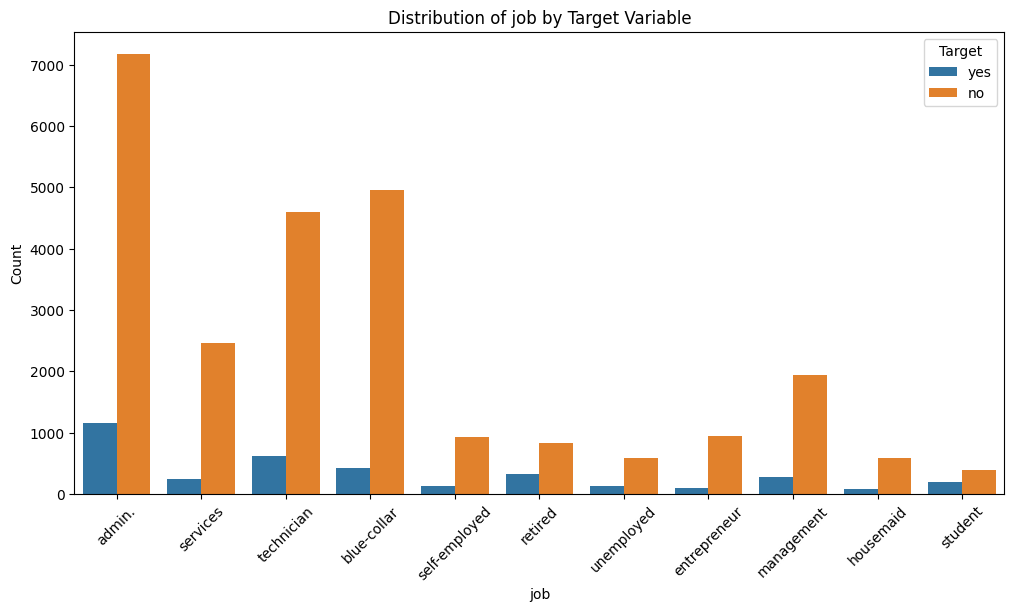

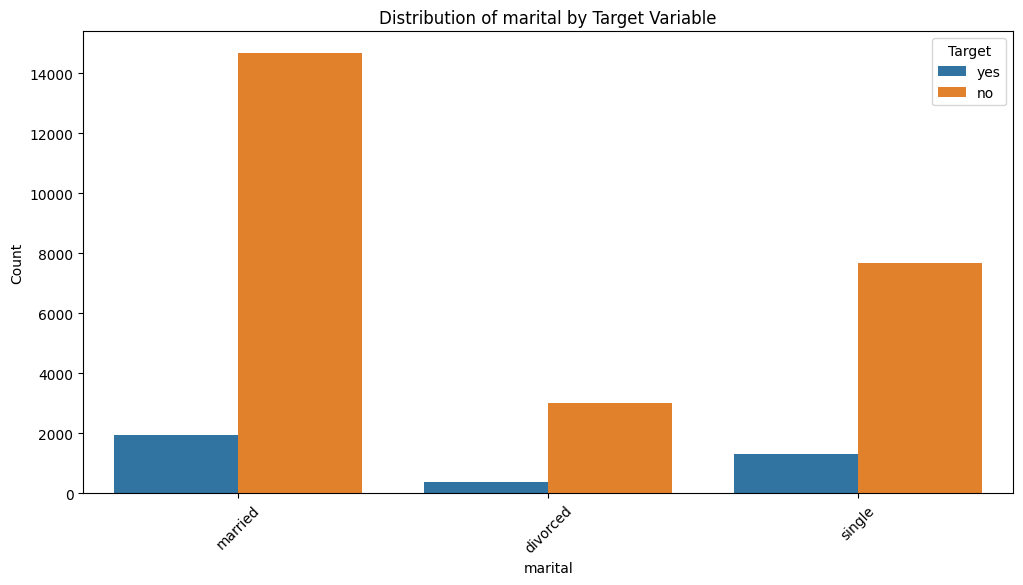

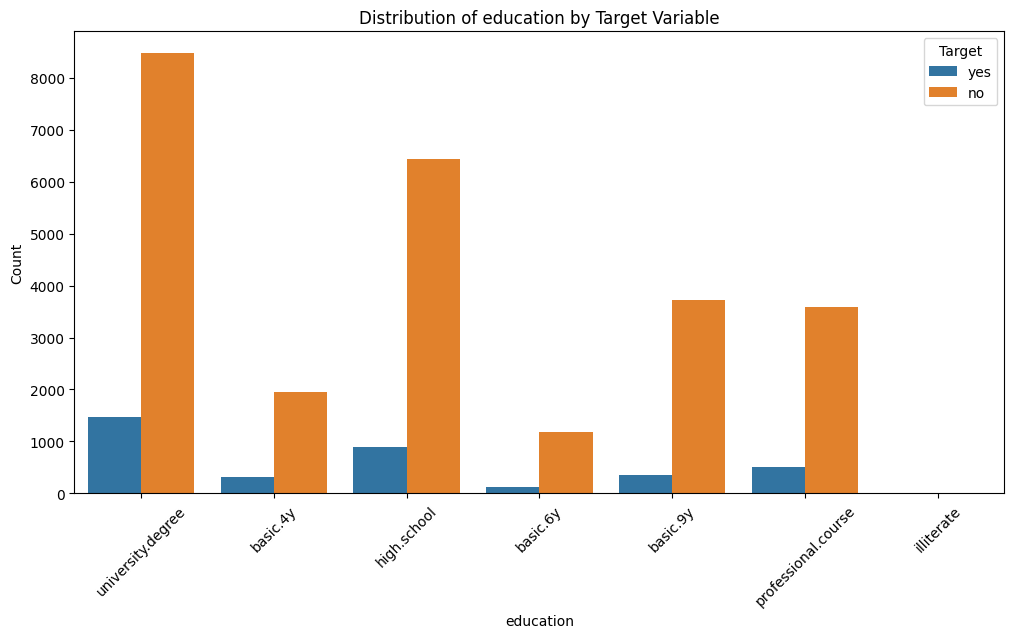

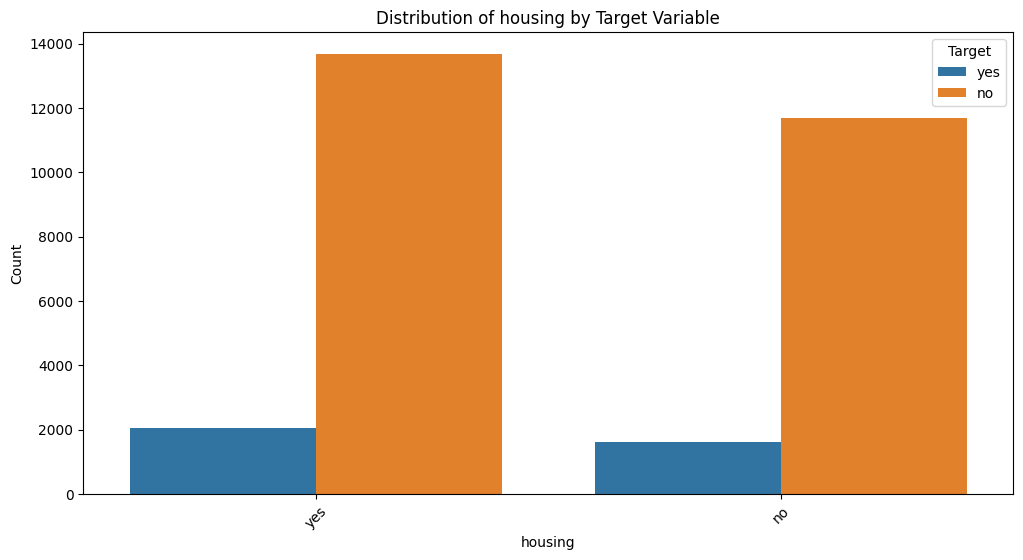

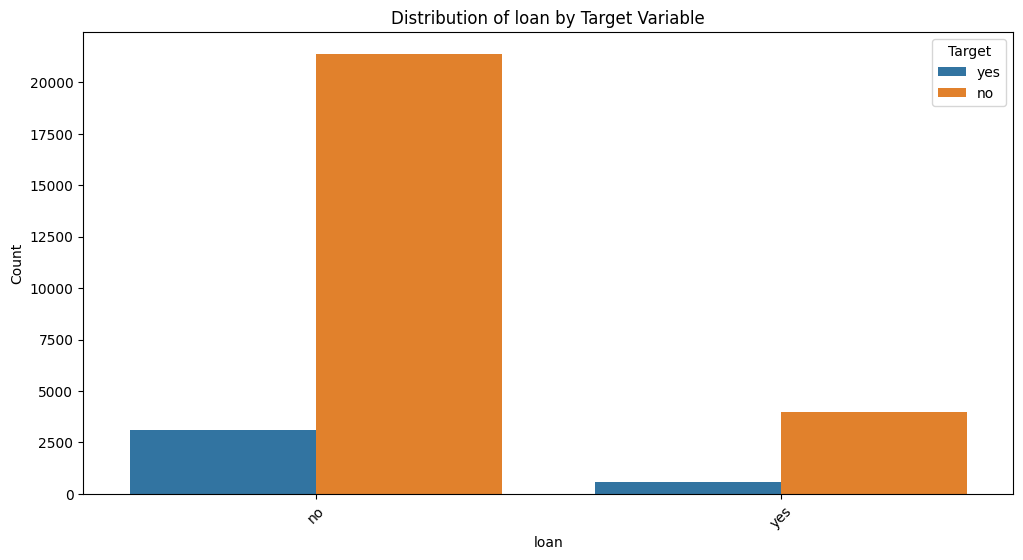

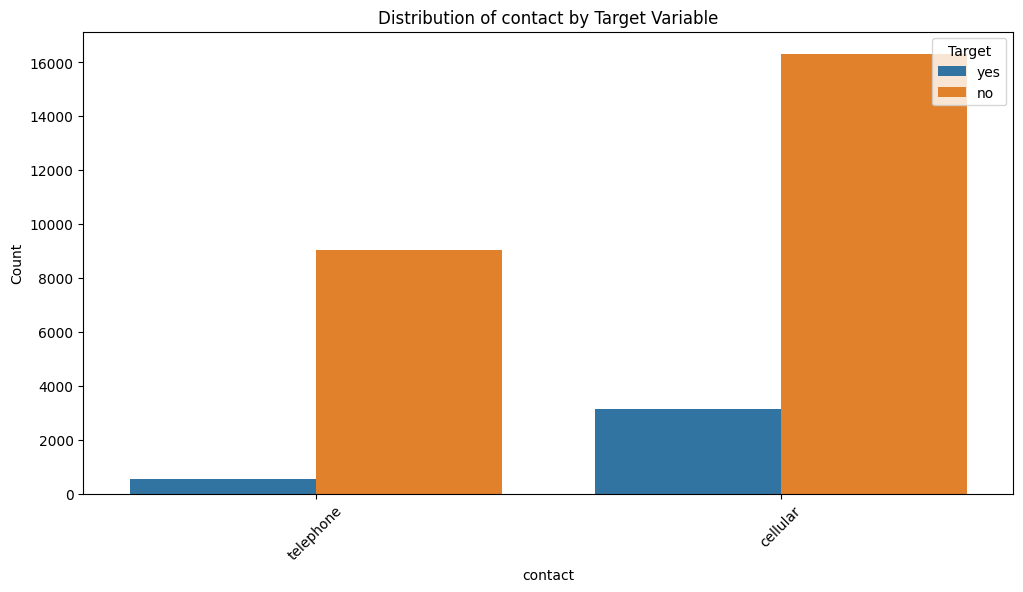

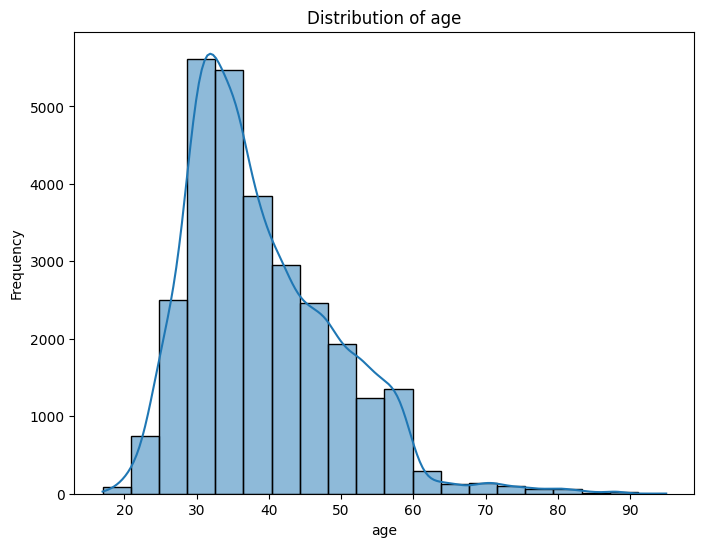

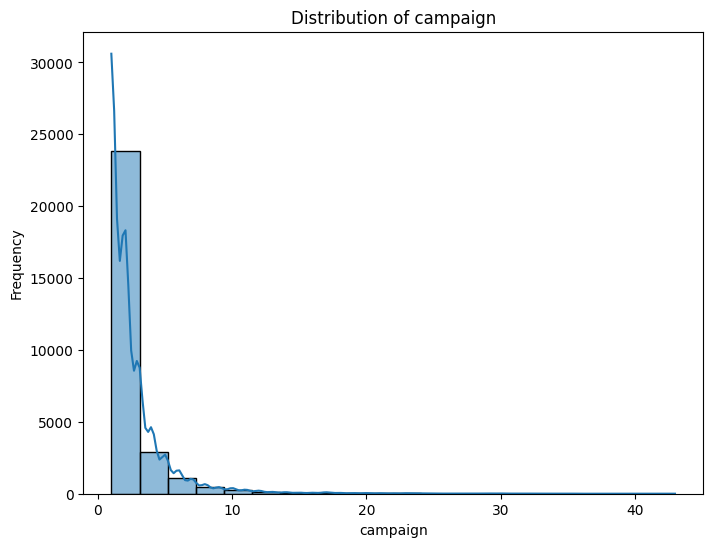

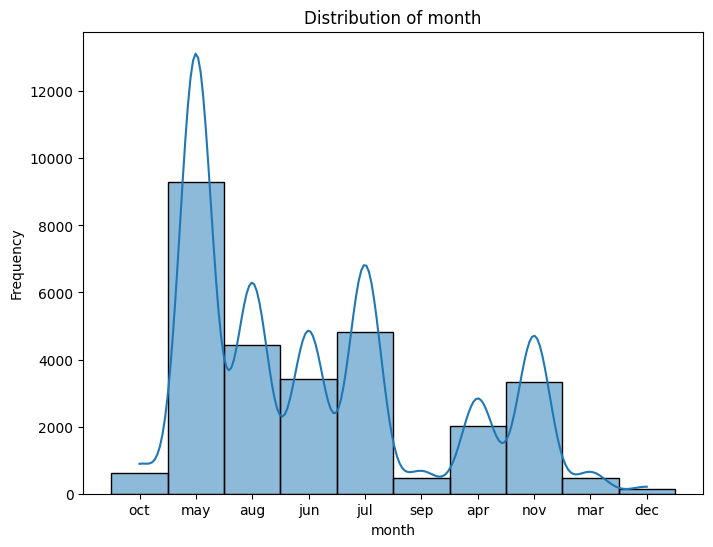

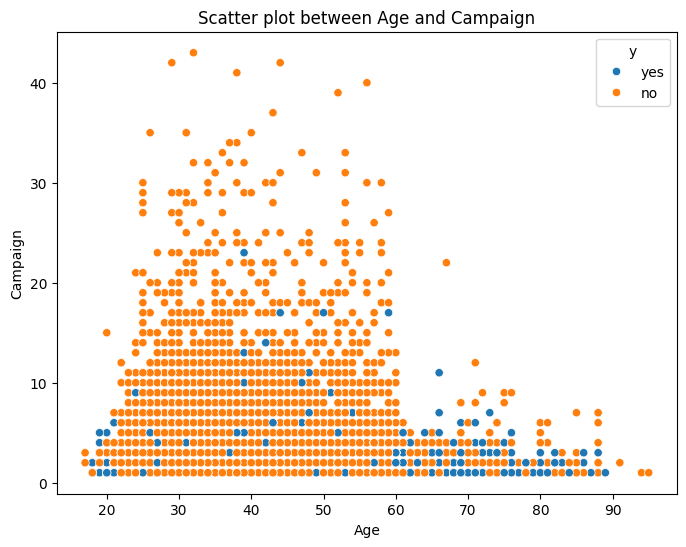

In [ ]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of target variable
categorical_vars = ['job', 'marital', 'education', 'housing', 'loan', 'contact']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=var, data=df, hue='y')
    plt.title(f'Distribution of {var} by Target Variable')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Target', loc='upper right')
    plt.show()

# Visualize distribution of numerical variables (histograms)
numerical_vars = ['age', 'campaign', 'month']
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Scatter plot between age and Campaign
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='campaign', hue='y')
plt.title('Scatter plot between Age and Campaign')
plt.xlabel('Age')
plt.ylabel('Campaign')
plt.show()

# **4. Linear Regression Model**


**Theory Recap:**
*   **Linear Regression** is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events. It is a statistical method used in data science and machine learning for predictive analysis.

**Implementation:**
1.   **Feature Selection**: Choose relevant features expected to have a linear relationship with the target variable.
2.   **Model Fitting**: Fit the Linear Regression model to the training data using the least squares method to estimate coefficients.
3.   **Coefficient Interpretation**: Interpret the coefficients to understand each feature's impact on the target variable.
4.  **Threshold Selection**: Use the trained model to predict target values for new data based on feature values and learned coefficients.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("bank_customers_train.csv")
df = pd.get_dummies(df, columns=['job'])

# Encode the target variable 'y'
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Selecting features
selected_features = ['age'] + [col for col in df.columns if col.startswith('job_')]
target_variable = 'y'

# Splitting data into train and test sets
X = df[selected_features]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model Evaluation
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

print("\nLinear Regression Model Evaluation:")
print("R-squared:", r2_lr)
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)

# Coefficients Interpretation
coefficients = pd.DataFrame({'Features': X.columns, 'Coefficients': lr_model.coef_})
print("\nCoefficients:\n", coefficients)


Linear Regression Model Evaluation:
R-squared: 0.02532859072480631
Mean Squared Error (MSE): 0.09714373673823318
Root Mean Squared Error (RMSE): 0.31167890005297627

Coefficients:
              Features  Coefficients
0                 age      0.000264
1          job_admin.      0.026564
2     job_blue-collar     -0.035639
3    job_entrepreneur     -0.021447
4       job_housemaid     -0.006860
5      job_management      0.009886
6         job_retired      0.129806
7   job_self-employed      0.001283
8        job_services     -0.023912
9         job_student      0.214630
10     job_technician      0.003974
11     job_unemployed      0.032552


# **5. Logistic Regression Model**

**Theory Recap:**
*   **Logistic Regression** is a popular statistical
method used for binary classification problems. Unlike linear regression, which predicts continuous values, logistic regression predicts the probability that an instance belongs to a particular class. It's based on the logistic function, also known as the sigmoid function, which maps any real-valued number into the range [0, 1].

**Implementation:**
1.   **Feature Selection**: Choose relevant features for the model.
2.   **Model Fitting**: Fit the Logistic Regression model to the training data.
3.   **Coefficient Interpretation**: Interpret the coefficients of the model to understand the impact of each feature on the predicted probability.
4.  **Threshold Selection**: Choose an appropriate threshold for classification.



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8877264608318448
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC: 0.6106598193054431

Coefficients (Logistic Regression):
              Features  Coefficients
0                 age      0.002644
1          job_admin.      0.195924
2     job_blue-collar     -0.511651
3    job_entrepreneur     -0.304190
4       job_housemaid     -0.128657
5      job_management      0.041638
6         job_retired      0.871643
7   job_self-employed     -0.045904
8        job_services     -0.343949
9         job_student      1.338184
10     job_technician     -0.017592
11     job_unemployed      0.245332


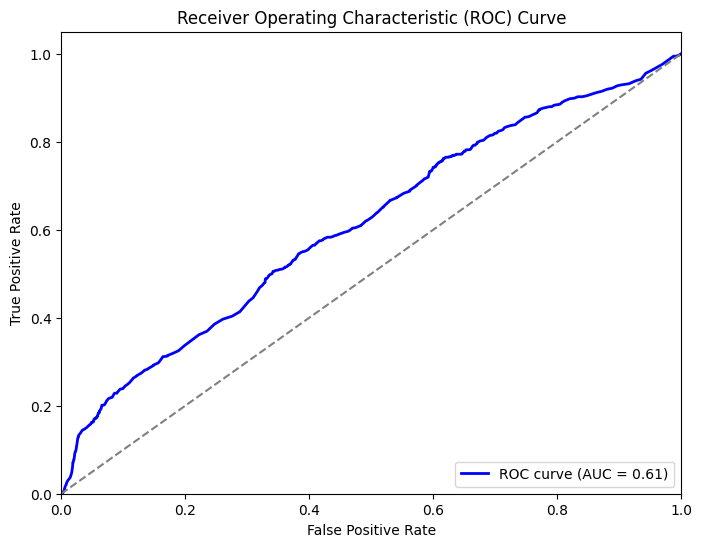

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

## Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Model Evaluation
y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ROC Curve and AUC
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", roc_auc)

# Coefficients Interpretation
coefficients_log_reg = pd.DataFrame({'Features': X.columns, 'Coefficients': log_reg_model.coef_[0]})
print("\nCoefficients (Logistic Regression):\n", coefficients_log_reg)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# **6. Model Comparison and Selection**




---


**Linear Regression Model Evaluation:**

    R-squared (Linear): 0.025
    Mean Squared Error (Linear): 0.097
    Root Mean Squared Error (Linear): 0.312

**Logistic Regression Model Evaluation:**

    Accuracy: 0.888
    Precision: 0.0
    Recall: 0.0
    F1 Score: 0.0
    AUC: 0.611

---

**Coefficients Interpretation:**
*   Both Linear and Logistic Regression models show coefficients for different features, indicating their impact on the target variable.
*   In Logistic Regression, coefficients represent the change in log-odds of the target class for a one-unit change in the predictor variable.

**Model Comparison and Selection:**


*   Performance Metrics:
        Linear Regression has a low R-squared value, indicating poor fit to the data, while Logistic Regression has a higher accuracy but poor precision, recall, and F1 score.
*   Suitability:
        Linear Regression might be suitable for predicting a continuous target variable (although the performance metrics are not very high in this case).
        Logistic Regression is chosen for binary classification tasks, but its low precision, recall, and F1 score indicate poor performance in this case.
*   Decision-Making Process:
        Given the poor performance of both models, further analysis is required to understand the data and possibly improve model performance. Consideration of feature engineering, data preprocessing, or alternative modeling techniques may be necessary.







# **7. Conclusion and Insights**

In this case study, we employed statistical and machine learning methods, including linear regression and logistic regression, to analyze a marketing dataset. While linear regression helped uncover factors influencing disease progression, logistic regression aimed to categorize patients. Despite their application, both models demonstrated suboptimal performance, indicating the need for further investigation.

---
**Potential Applications:**
These models are applicable in a variety of fields. They support the prediction of disease progression and the optimization of treatment plans in the medical field. They support the identification of critical variables in marketing that affect customer targeting and campaign efficacy. Additionally, they assist in forecasting consumer behavior in finance for risk assessment and investment choices.

**Model Limitations:**
It's crucial to acknowledge assumptions such as linearity in linear regression for accurate predictions. Similarly, being mindful of limitations like overfitting and underfitting ensures reliable model performance and decision-making.



---



By keeping these insights in mind, stakeholders can make informed decisions based on data-driven analysis.


# **8. References**



---

**Marketing Campaign Dataset**: https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners

**CSEL 302 Midterm Exam Assessment Task**: [CSEL302-Midterm-Exam-Assessment-Task.pdf](https://cdn.discordapp.com/attachments/1226725240994791425/1226725283680354458/CSEL302-Midterm-Exam-Assessment-Task.pdf?ex=6625cff3&is=66135af3&hm=44bd797cfa7eb85c3282dfde76860e63240f8a06020aab4d7312022f3833ffa4&)

**Python libraries used pandas, NumPy, scikit-learn, Matplotlib,Seaborn:**
*   pandas documentation: https://pandas.pydata.org/docs/
*   NumPy documentation:https://numpy.org/doc/
*   Matplotlib documentation: https://matplotlib.org/stable/index.html
*   Scikit-learn documentation for Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
*   Scikit-learn documentation for Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
*   Seaborn documentation: https://pypi.org/project/seaborn/


Theory Recap for Logistic Regression: [What is Logistic Regression](https://medium.com/@vk.viswa/logistic-regression-d001d0bce6c7)

Theory Recap for Linear Regression: [What is Linear Regression](https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-linear-regression/)

### **ChatGPT for assistance:** [ChatGPT](https://chat.openai.com/)
